   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47          blue  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  y  
0  unknown    5   may       261         1     -1         0  unknown  0  
1  unknown    5   may       151         1     -1         0  unknown  0  
2  unknown    5   may        76         1     -1         0  unknown  0  
3  unknown    5   may        92         1     -1         0  unknown  0  
4  unknown    5   may       198         1     -1         0  unknown  0  


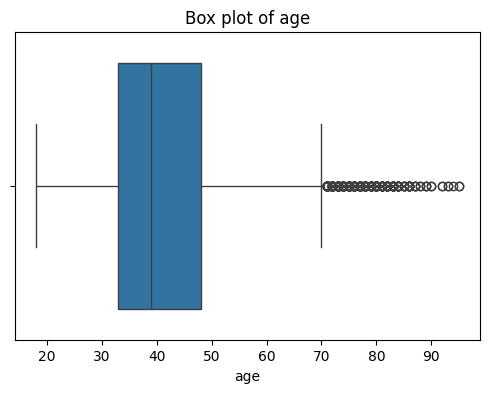

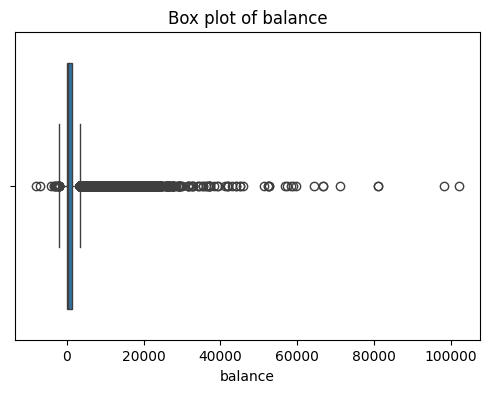

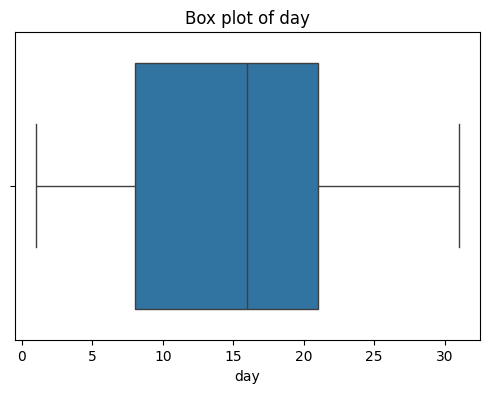

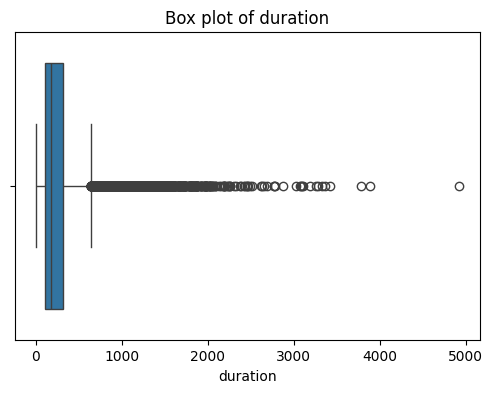

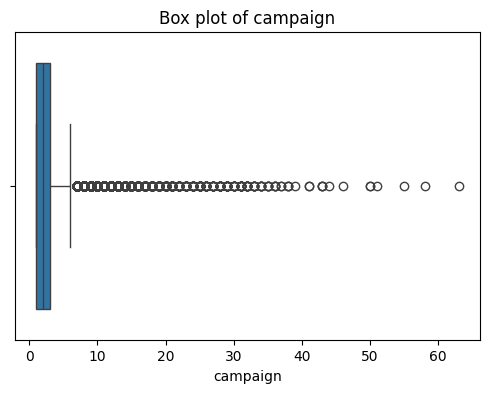

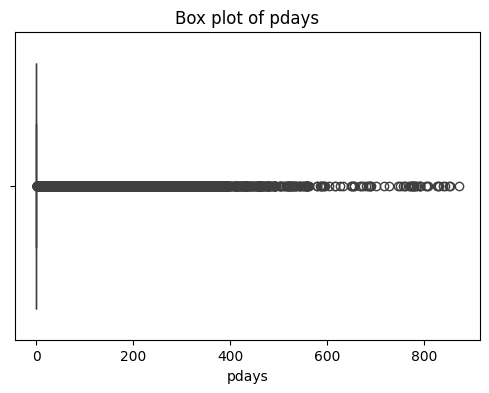

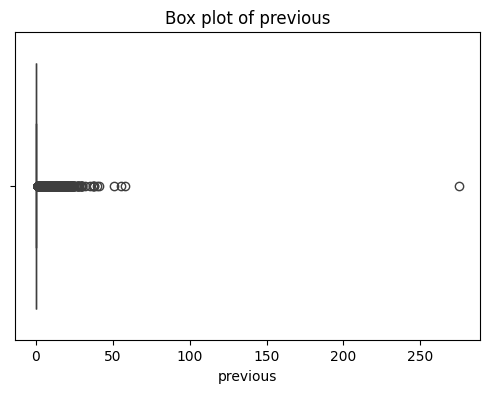

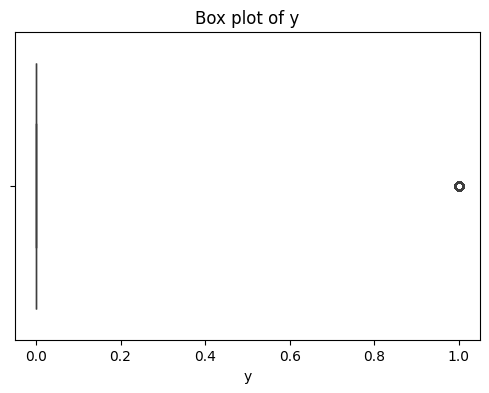

Outliers in age: 487
Outliers in balance: 4729
Outliers in day: 0
Outliers in duration: 3235
Outliers in campaign: 3064
Outliers in pdays: 8257
Outliers in previous: 8257
Outliers in y: 5289


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/bank_customer_survey.csv")
print(df.head())

# Select numerical columns
nc = df.select_dtypes(include=['number']).columns

# Generate box plots for each numerical column
for col in nc:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box plot of {col}")
    plt.show()

# Detect and count outliers using IQR
outlier_counts = {
    col: ((df[col] < (df[col].quantile(0.25) - 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25)))) |
          (df[col] > (df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))))).sum()
    for col in nc
}

# Print outlier counts
for col, count in outlier_counts.items():
    print(f"Outliers in {col}: {count}")
